# Superconductivity Data Analysis

In this project, we explore a dataset from the UCI Machine Learning Repository containing information on 21,263 superconducting materials. Each material is described by 81 physical and chemical features. Our goal is to better understand how these features relate to the **critical temperature** the point at which a material becomes superconductive.

To uncover patterns, relationships, and feature interactions, we use 3D data visualizations. These visual tools provide deeper insights than 2D plots by allowing us to explore feature combinations and how they jointly affect superconductivity. We'll experiment with different 3D graph types such as **scatter plots**, **surface plots**, **wireframes**, **bar charts**, and **contour maps**, each offering a unique perspective.

The dataset was introduced in the following paper:

> **Hamidieh, K. (2018).** *A data-driven statistical model for predicting the critical temperature of a superconductor.* Computational Materials Science.


<h3>Load Dataset</h3>
<p>Peek through the dataset and load, and display the first five rows of data. This helps us understand the structure of the dataset how the features are organized, what kind of values we’re dealing with, and how the critical temperature is presented.</p>

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm

# Load the dataset
df = pd.read_csv('train.csv')

# Show the first five rows
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


### 1. 3D Scatter: Atomic Mass, Entropy vs. Critical Temperature

**Purpose and Rationale:**  
This 3D scatter plot helps us understand how two physical characteristics of a material mean atomic mass and atomic entropy relate to its ability to become superconductive. By visualizing all three variables together in one graph, we can look for combinations of mass and entropy that are more likely to result in a higher critical temperature. The 3D view allows us to see patterns and groupings that would be harder to notice in separate 2D plots.

**Big Takeaway:**  
The plot shows that materials with moderate levels of atomic mass and entropy tend to have higher critical temperatures. This means that neither very high nor very low values are ideal on their own—it’s the right balance between the two that seems to matter most.


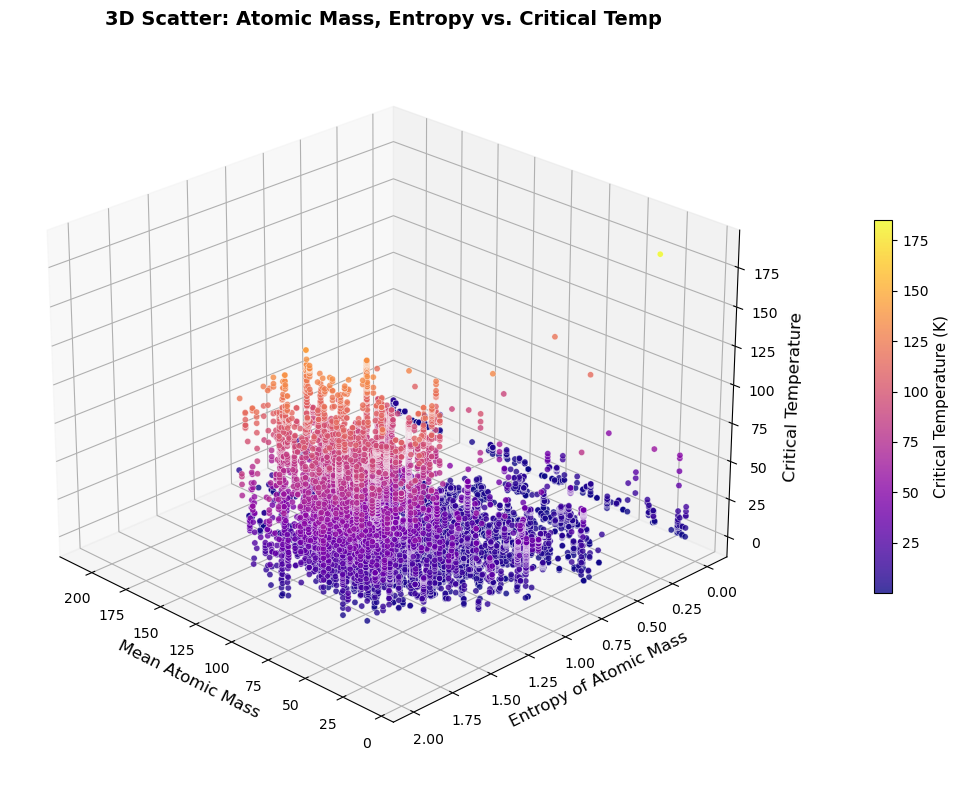

In [11]:
# Create a figure with specified width and height, and 3D subplot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract data
x = df['mean_atomic_mass']
y = df['entropy_atomic_mass']
z = df['critical_temp']

# Create scatter plot with style
sc = ax.scatter(x, y, z, c=z, cmap='plasma', s=20, alpha=0.8, edgecolors='w', linewidth=0.3)

# Set viewing angle for better depth
ax.view_init(elev=25, azim=135)

# Titles and labels
ax.set_title("3D Scatter: Atomic Mass, Entropy vs. Critical Temp", fontsize=14, fontweight='bold')
ax.set_xlabel("Mean Atomic Mass", fontsize=12)
ax.set_ylabel("Entropy of Atomic Mass", fontsize=12)
ax.set_zlabel("Critical Temperature", fontsize=12)

# Add grid and colorbar
ax.grid(True, linestyle='--', alpha=0.4)
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, pad=0.1)
cbar.set_label('Critical Temperature (K)', fontsize=11)

# Save and show
plt.tight_layout()
plt.savefig("ChakerBaloch_3DScatter.png", dpi=300)
plt.show()


### 2. 3D Surface: Atomic Mass Range & Std Dev vs. Critical Temperature

**Purpose and Rationale:**  
This 3D surface plot shows how the variability in atomic mass measured by the range and standard deviation relates to the critical temperature of superconducting materials. Instead of showing individual points, this surface gives us a smoothed overview of how these two features interact together and affect the temperature. It helps answer the question: Do materials with more diverse atomic masses perform better or worse as superconductors?

**Big Takeaway:**  
The surface reveals that materials with moderate variability in atomic mass tend to reach higher critical temperatures. When the atomic mass becomes too inconsistent or too uniform, the critical temperature usually drops. This pattern would be hard to see in a flat 2D plot but becomes much clearer with the depth provided by the 3D surface.



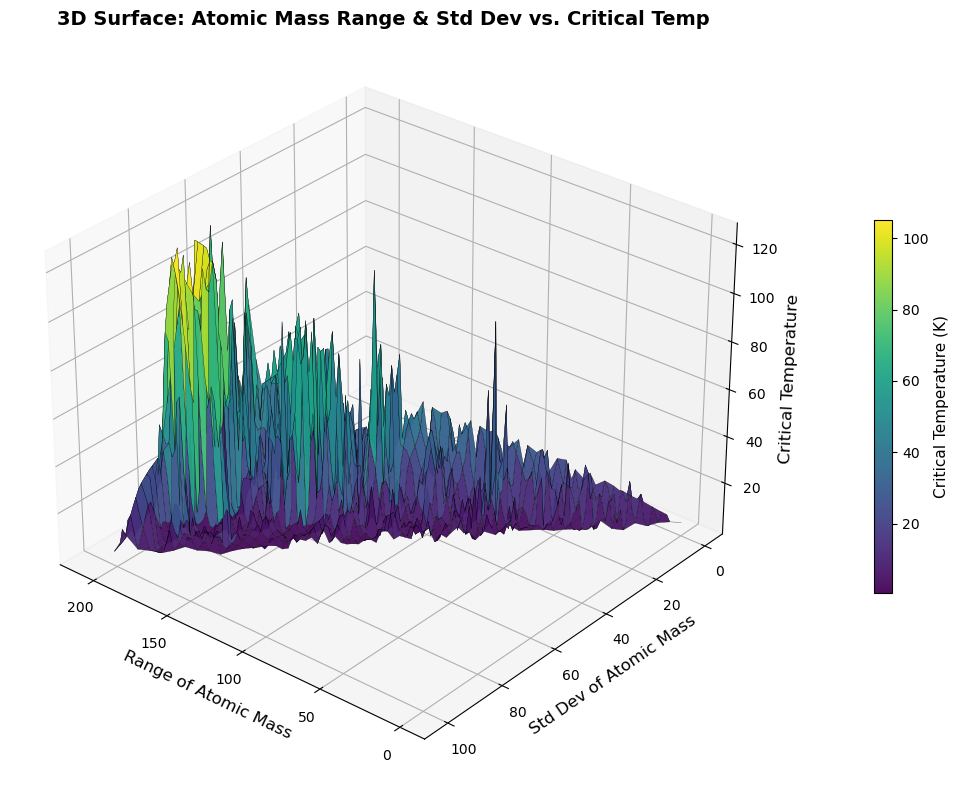

In [9]:
# Prepare data
x = df['range_atomic_mass']
y = df['std_atomic_mass']
z = df['critical_temp']

xi, yi = np.meshgrid(np.linspace(x.min(), x.max(), 100),
                     np.linspace(y.min(), y.max(), 100))
zi = griddata((x, y), z, (xi, yi), method='linear')

# Create styled 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    xi, yi, zi,
    cmap='viridis',
    edgecolor='k',
    linewidth=0.2,
    alpha=0.95,
    antialiased=True
)

# Adjust view angle for clarity
ax.view_init(elev=30, azim=130)

# labels and title
ax.set_title("3D Surface: Atomic Mass Range & Std Dev vs. Critical Temp", fontsize=14, fontweight='bold')
ax.set_xlabel("Range of Atomic Mass", fontsize=12)
ax.set_ylabel("Std Dev of Atomic Mass", fontsize=12)
ax.set_zlabel("Critical Temperature", fontsize=12)

# Colorbar
cbar = plt.colorbar(surf, ax=ax, shrink=0.5, pad=0.1)
cbar.set_label('Critical Temperature (K)', fontsize=11)

# Grid
ax.grid(True, linestyle=':', alpha=0.4)

# Save and display
plt.tight_layout()
plt.savefig("ChakerBaloch_3DSurface.png", dpi=300)
plt.show()


### 3. 3D Wireframe: Valence & Entropy vs. Critical Temperature

**Purpose and Rationale:**  
This 3D wireframe plot is designed to show how a material’s weighted mean valence (a measure of how atoms share electrons) and the entropy of valence (how varied those values are) relate to its critical temperature. The wireframe helps us understand how the structure of electron distribution might influence whether a material becomes superconductive, and at what temperature.

**Big Takeaway:**  
The plot suggests that materials with a balanced valence and moderate entropy tend to reach higher critical temperatures. Extreme values either too ordered or too chaotic don’t seem to support superconductivity as well. The 3D wireframe makes this easier to understand by clearly showing the shape and slope of these relationships across the entire feature space.



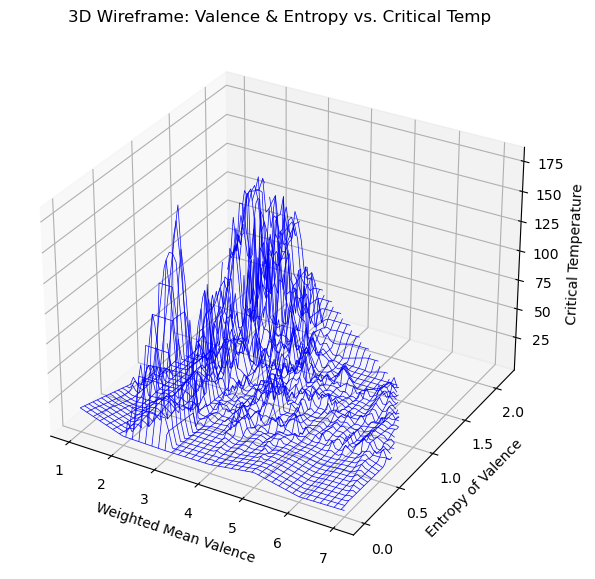

In [63]:
# x, y, z values from the DataFrame
x = df['wtd_mean_Valence']
y = df['entropy_Valence']
z = df['critical_temp']

# Create a grid for interpolation
xi, yi = np.meshgrid(np.linspace(x.min(), x.max(), 80), np.linspace(y.min(), y.max(), 80))

# Interpolate z values over the grid
zi = griddata((x, y), z, (xi, yi), method='linear')

# Set up 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the wireframe
ax.plot_wireframe(xi, yi, zi, color='blue', linewidth=0.5)

# Add labels and title
ax.set_title("3D Wireframe: Valence & Entropy vs. Critical Temp")
ax.set_xlabel("Weighted Mean Valence")
ax.set_ylabel("Entropy of Valence")
ax.set_zlabel("Critical Temperature")

# Save and show the plot
plt.savefig("ChakerBaloch_3DWireframe.png")
plt.show()


### 4. 3D Bar: Element Count vs. Avg Critical Temperature

**Purpose and Rationale:**  
This 3D bar plot shows how the number of different elements in a material affects its average critical temperature. By grouping materials based on how many elements they contain and comparing their average performance, we aim to find out whether simpler or more complex materials tend to be better superconductors.

**Big Takeaway:**  
The bars reveal that materials with around 3 to 5 different elements tend to have the highest average critical temperatures. This suggests there may be an ideal level of complexity in a material’s composition for achieving better superconductivity. The 3D view makes it easier to compare the heights of each group and quickly spot which element counts are most effective.




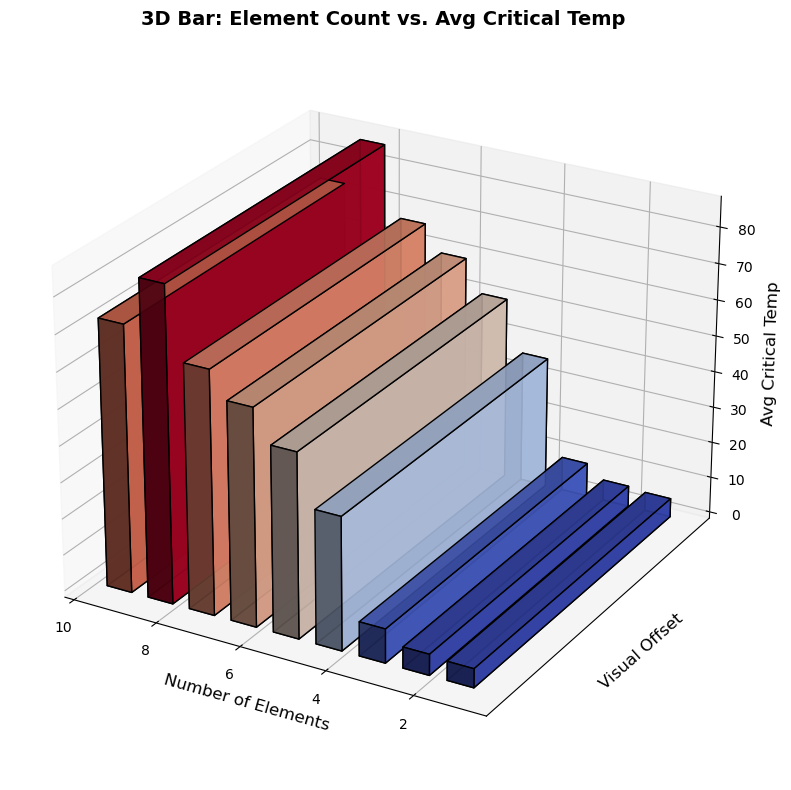

In [7]:
# Group data and extract values
grouped = df.groupby('number_of_elements')['critical_temp'].mean().reset_index()
x = grouped['number_of_elements']
y = np.zeros_like(x)
z = np.zeros_like(x)
dz = grouped['critical_temp']

# Normalize values for colormap
colors = cm.coolwarm((dz - dz.min()) / (dz.max() - dz.min()))

# Create styled 3D bar plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

bars = ax.bar3d(
    x, y, z,
    dx=0.6, dy=0.6, dz=dz,
    color=colors,
    edgecolor='k',
    alpha=0.9
)

# Set camera view
ax.view_init(elev=25, azim=120)
ax.yaxis.set_ticks([])


# Labels and title
ax.set_title("3D Bar: Element Count vs. Avg Critical Temp", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Elements", fontsize=12)
ax.set_ylabel("Visual Offset", fontsize=12)
ax.set_zlabel("Avg Critical Temp", fontsize=12)

# Add grid
ax.grid(True, linestyle=':', alpha=0.4)

# Save and display
plt.tight_layout()
plt.savefig("ChakerBaloch_3DBar_Elements.png", dpi=300)
plt.show()


### 5. 3D Contour: Valence Entropy & Std Dev vs. Critical Temperature

**Purpose and Rationale:**  
This 3D contour plot examines how two statistical features, weighted entropy of valence and standard deviation of valence relate to a material’s critical temperature. These features reflect how unpredictable or spread out the electron related properties are within a material. The goal is to identify regions where this kind of variation leads to better superconducting performance.

**Big Takeaway:**  
The contour lines show that certain combinations of valence entropy and standard deviation are more likely to result in higher critical temperatures. The 3D shape makes it easier to spot the “peaks” and “valleys” in the data areas where superconductivity is stronger or weaker, something that’s harder to capture with a 2D contour plot.



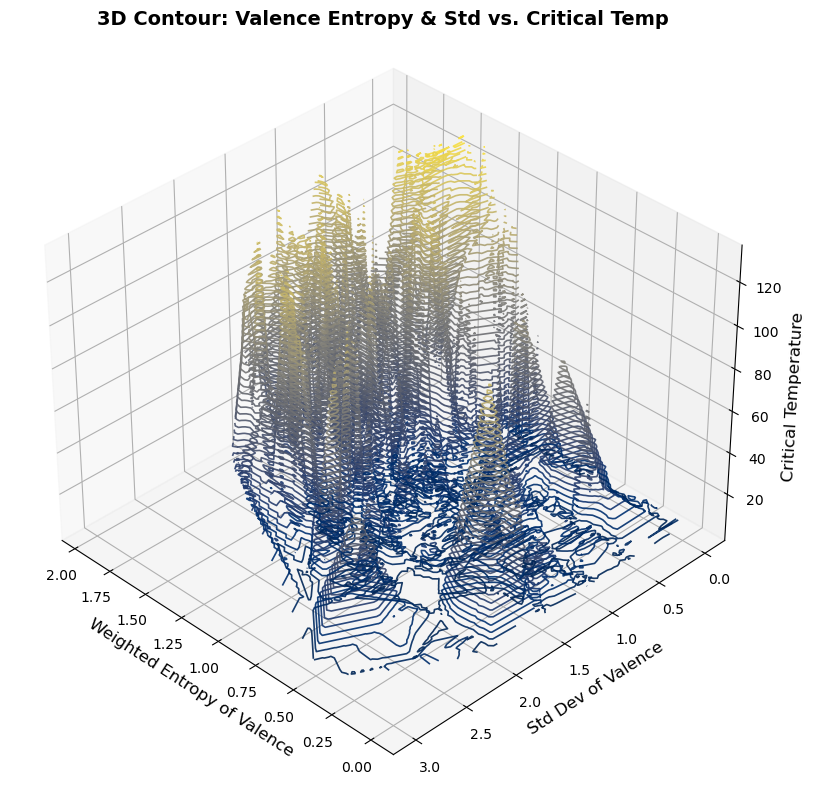

In [61]:
# Prepare the grid for contouring
x = df['wtd_entropy_Valence']
y = df['std_Valence']
z = df['critical_temp']

xi, yi = np.meshgrid(
    np.linspace(x.min(), x.max(), 100),
    np.linspace(y.min(), y.max(), 100)
)
zi = griddata((x, y), z, (xi, yi), method='linear')

# Create styled 3D contour plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

contours = ax.contour3D(
    xi, yi, zi,
    levels=50,
    cmap='cividis',
    linewidths=1.2,
    alpha=0.9
)

# Set view angle
ax.view_init(elev=35, azim=135)

# Set title and labels
ax.set_title("3D Contour: Valence Entropy & Std vs. Critical Temp", fontsize=14, fontweight='bold')
ax.set_xlabel("Weighted Entropy of Valence", fontsize=12)
ax.set_ylabel("Std Dev of Valence", fontsize=12)
ax.set_zlabel("Critical Temperature", fontsize=12)

# Add grid
ax.grid(True, linestyle='--', alpha=0.4)

# Save and display
plt.tight_layout()
plt.savefig("ChakerBaloch_3DContour.png", dpi=300)
plt.show()
